# About Dataset:

Context

The crude oil price movements are subject to diverse influencing factors. This dataset was retrieved from the U.S. Energy Information Administration: Europe Brent Spot Price FOB (Dollars per Barrel)

Content

The aim of this dataset and work is to predict future Crude Oil Prices based on the historical data available in the dataset.
The data contains daily Brent oil prices from 17th of May 1987 until the 13th of November 2022.

Acknowledgements

Dataset is available on U.S. Energy Information Administration: Europe Brent Spot Price FOB (Dollars per Barrel) which is updated on weekly bases.

Inspiration

The vast competition in the Data Science field and the availability of the new Prophet method made it easier to predict future prices, that is what you may find when predicting the oil prices with this dataset.



# ARIMA :
## ARIMA (AutoRegressive Integrated Moving Average) is a popular statistical model used for time series forecasting. It combines autoregressive (AR) terms, differencing (I) to make the data stationary, and moving averages (MA). ARIMA is effective for capturing patterns in data with trends and seasonality.


## Loading and Preprocessing the Data

Load the Dataset: Import the Brent oil prices dataset and parse the 'Date' column as datetime.

Set the Index: Convert the 'Date' column to a datetime format and set it as the index.

Resample Data to Monthly Frequency: Resample the data to monthly frequency, calculating the mean price for each month to reduce noise and prepare for ARIMA fitting.

In [4]:
import pandas as pd

data=pd.read_csv('BrentOilPrices1.csv', parse_dates=['Date'])

C:\Users\SUKANNA DAS\AppData\Local\Temp\ipykernel_5488\636127598.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data=pd.read_csv('BrentOilPrices1.csv', parse_dates=['Date'])


In [5]:
# Step 1: Convert 'Date' to datetime and set it as index
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
data.set_index('Date', inplace=True)

# Step 2: Resample to monthly frequency using mean
monthly_data = data.resample('M').mean()

# Step 3: Format the index to show only Month-Year
monthly_data.index = monthly_data.index.strftime('%b-%Y')




C:\Users\SUKANNA DAS\AppData\Local\Temp\ipykernel_5488\425692211.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


In [6]:
# Assuming your DataFrame is named `monthly_data`
monthly_data = monthly_data.iloc[1:-1]


In [7]:
monthly_data.head(5)

,Price
Date,
Jun-1987,18.860476
Jul-1987,19.856522
Aug-1987,18.979524
Sep-1987,18.313182
Oct-1987,18.757727


In [8]:
monthly_data.tail(5)

,Price
Date,
Nov-2019,63.211905
Dec-2019,67.310000
Jan-2020,63.824783
Feb-2020,55.702000
Mar-2020,32.470000


In [9]:
monthly_data.isna().sum()

Price    0
dtype: int64

In [10]:
monthly_data.duplicated().sum()

0

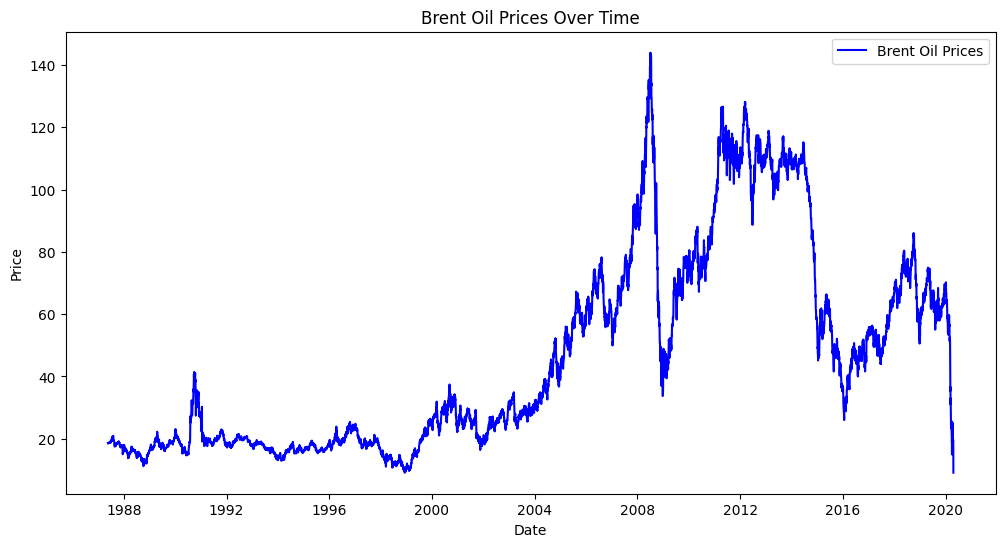

In [11]:
import matplotlib.pyplot as plt

# Plot the Brent oil prices
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price'], label='Brent Oil Prices', color='blue')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## Time Series Decomposition

Perform seasonal decomposition using the multiplicative or additive method to break the series into:

Trend: The long-term movement in the series.

Seasonality: The repeating patterns or cycles within a fixed period (e.g., annual seasonality).

Residual: The remainder of the data after removing the trend and seasonality (random noise).

## *Decomposition Interpretation:*

Both the MAE and RMSE are lower for the multiplicative model, suggesting that it provides a slightly better fit for this dataset. This might indicate that the relationship between the trend and seasonality in Brent oil prices is multiplicative in nature, meaning that seasonal fluctuations are proportional to the level of the trend.
Multiplicative decomposition is more suitable for time series where seasonal effects increase as the level of the series increases, which could be the case for the Brent oil price data.

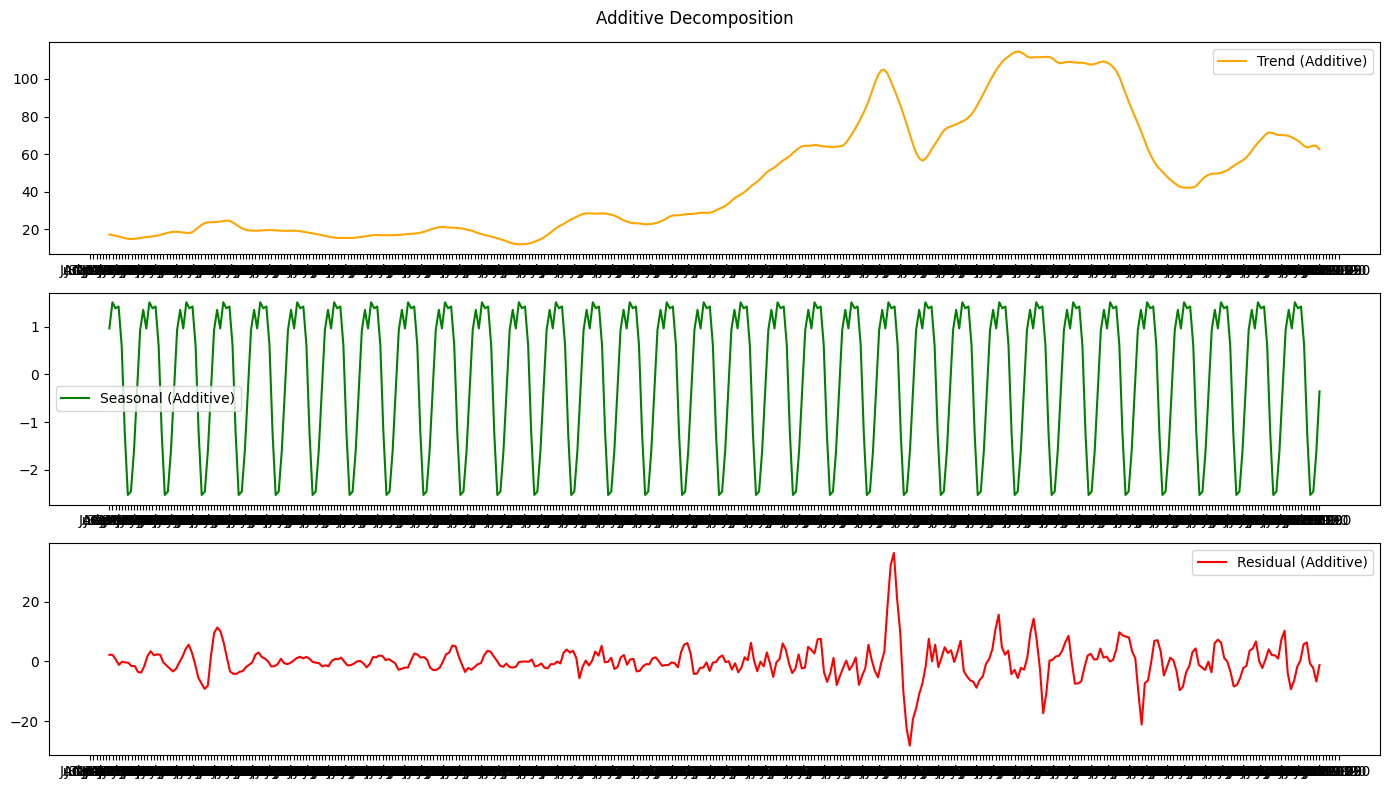

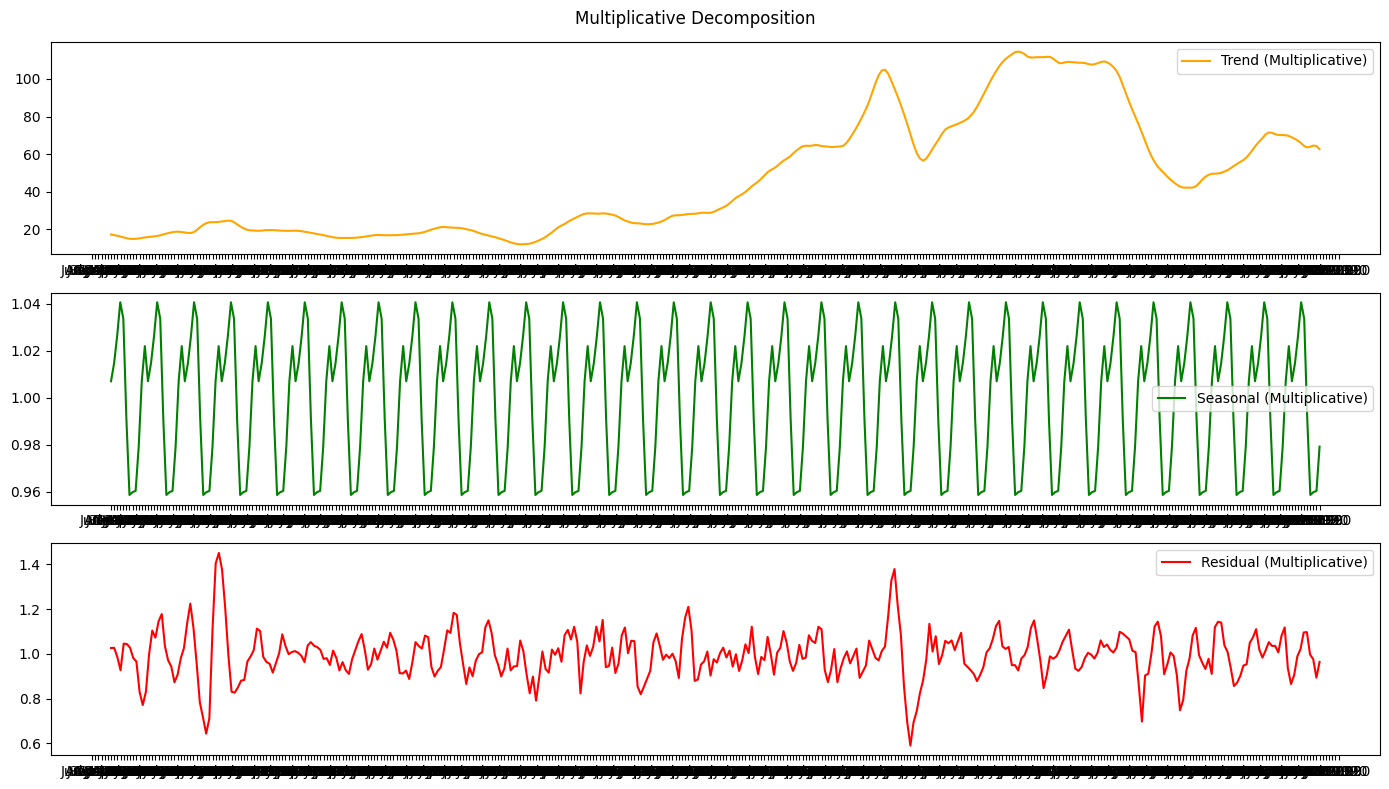

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose




# Additive decomposition
additive_decomposition = seasonal_decompose(monthly_data['Price'], model='additive', period=12)

# Multiplicative decomposition
multiplicative_decomposition = seasonal_decompose(monthly_data['Price'], model='multiplicative', period=12)

# Plot Additive Decomposition
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(monthly_data.index, additive_decomposition.trend, label='Trend (Additive)', color='orange')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(monthly_data.index, additive_decomposition.seasonal, label='Seasonal (Additive)', color='green')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(monthly_data.index, additive_decomposition.resid, label='Residual (Additive)', color='red')
plt.legend()

plt.suptitle('Additive Decomposition')
plt.tight_layout()
plt.show()

# Plot Multiplicative Decomposition
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(monthly_data.index, multiplicative_decomposition.trend, label='Trend (Multiplicative)', color='orange')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(monthly_data.index, multiplicative_decomposition.seasonal, label='Seasonal (Multiplicative)', color='green')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(monthly_data.index, multiplicative_decomposition.resid, label='Residual (Multiplicative)', color='red')
plt.legend()

plt.suptitle('Multiplicative Decomposition')
plt.tight_layout()
plt.show()



In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Compute residual errors
additive_residuals = additive_decomposition.resid.dropna()
multiplicative_residuals = multiplicative_decomposition.resid.dropna()

# MAE
additive_mae = mean_absolute_error(monthly_data['Price'].loc[additive_residuals.index], additive_residuals)
multiplicative_mae = mean_absolute_error(monthly_data['Price'].loc[multiplicative_residuals.index], multiplicative_residuals)

print(f"Additive Model MAE: {additive_mae}")
print(f"Multiplicative Model MAE: {multiplicative_mae}")

# RMSE
additive_rmse = np.sqrt(mean_squared_error(monthly_data['Price'].loc[additive_residuals.index], additive_residuals))
multiplicative_rmse = np.sqrt(mean_squared_error(monthly_data['Price'].loc[multiplicative_residuals.index], multiplicative_residuals))

print(f"Additive Model RMSE: {additive_rmse}")
print(f"Multiplicative Model RMSE: {multiplicative_rmse}")


Additive Model MAE: 46.90755166966135
Multiplicative Model MAE: 45.90859384650473
Additive Model RMSE: 56.70789579414842
Multiplicative Model RMSE: 56.42679975107384


## Time series analysis of Brent oil prices using a rolling mean and rolling standard deviation for a 12-month window.

Original Time Series (Blue Line):

This is the raw Brent oil price data. You can observe that the prices fluctuate over time, with some large spikes, particularly around the middle and later parts of the time period.

Rolling Mean (Red Line):

The rolling mean smooths out short-term fluctuations and highlights longer-term trends. It shows the general trend of the oil prices over the period, indicating periods of increase and decrease.
In periods where the red line (rolling mean) is rising, prices are generally increasing, while when it is falling, prices are decreasing.

Rolling Standard Deviation (Black Line):

The rolling standard deviation indicates the variability in the data. Higher values mean that prices are fluctuating more widely from the mean during that period.
For instance, in the middle of the graph where there is a large spike, the standard deviation also increases, showing high volatility during this period of price surges.

## *Interpretation :*

Periods of High Volatility: Around the mid-section of the graph (likely between 2006–2008 based on the general pattern of oil prices), there is a significant spike in both the price and the standard deviation, indicating a period of high volatility.

Long-Term Trend: The rolling mean shows a general trend of rising oil prices, followed by a sharp decline and some fluctuations later on.

Non-Stationarity: Since the rolling mean and standard deviation are not constant over time (they change significantly), this indicates the series is non-stationary. This means the statistical properties (like mean and variance) change over time, which is typical in financial time series data like oil prices.

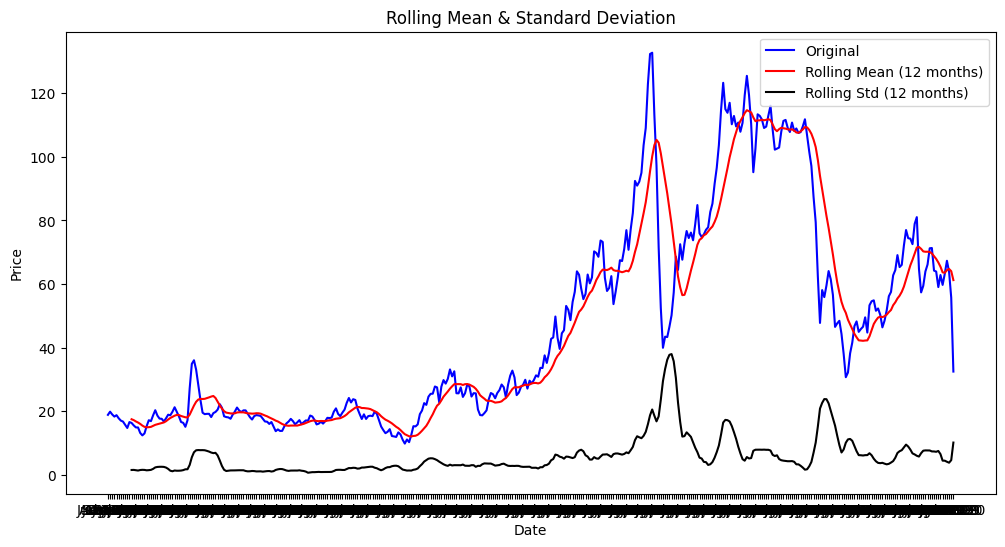

In [14]:
# Calculate rolling statistics
rolling_mean = monthly_data['Price'].rolling(window=12).mean()
rolling_std = monthly_data['Price'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index,monthly_data['Price'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean (12 months)')
plt.plot(rolling_std, color='black', label='Rolling Std (12 months)')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(False)
plt.show()


## Checking for Stationarity : 

Apply the Augmented Dickey-Fuller (ADF) Test on the original series to confirm stationarity.
If the p-value from the ADF test is below 0.05, the series is stationary, and you can proceed to fit the ARIMA model.
Otherwise, differencing may be necessary.

*## Interpretation:*

Null Hypothesis (H₀): The time series has a unit root, meaning it is non-stationary.
Alternative Hypothesis (H₁): The time series does not have a unit root, meaning it is stationary.

The p-value is greater than 0.05, which means you fail to reject the null hypothesis.
This suggests that the time series is non-stationary. The data does not have a constant mean and variance over time.

Since the series is non-stationary (as indicated by the p-value and the ADF statistic), you will need to apply differencing to make it stationary.

In [15]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(monthly_data['Price'])

# Extract and print results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -2.120939367424105
p-value: 0.23617855568966656
Critical Values:
   1%: -3.44714244478345
   5%: -2.8689414326247995
   10%: -2.5707127699396084


## Log Transformation

Apply a log transformation to stabilize the variance and ensure the data is stationary in variance.

This step is crucial for improving the model's performance when fitting ARIMA, as it helps to deal with heteroscedasticity.

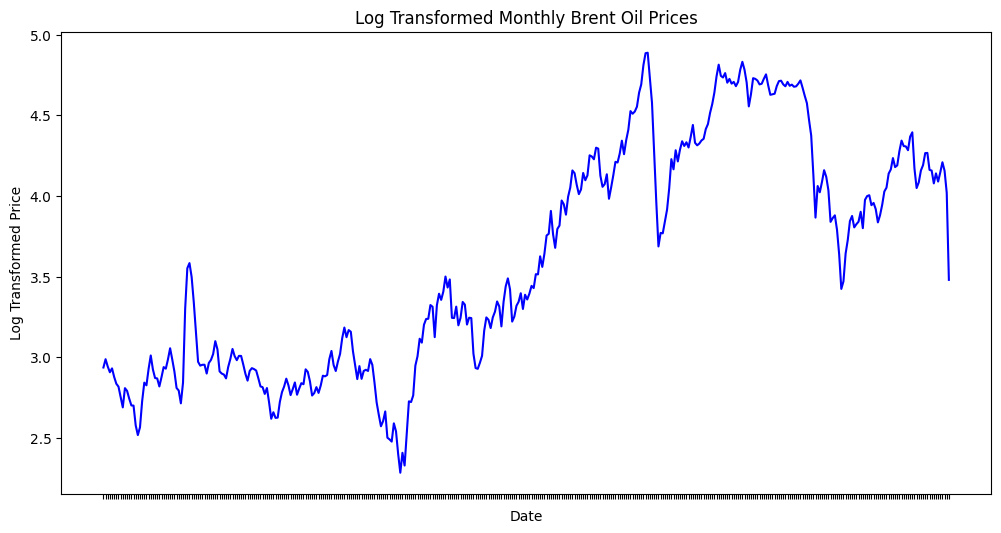

In [16]:
# Apply log transformation
monthly_data['Price_log'] = np.log(monthly_data['Price'])


plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index,monthly_data['Price_log'], color='blue')
plt.title('Log Transformed Monthly Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Log Transformed Price')
plt.gca().xaxis.set_major_formatter(plt.NullFormatter()) 
plt.grid(False)
plt.show()

## Differencing to Remove Trends


First-order differencing: Apply first-order differencing to remove any linear trends and make the series stationary in mean.

Seasonal Differencing: Perform seasonal differencing with a lag equal to 12 (for monthly data) to account for any seasonal trends in the data.
Drop any resulting NaN values from differencing.



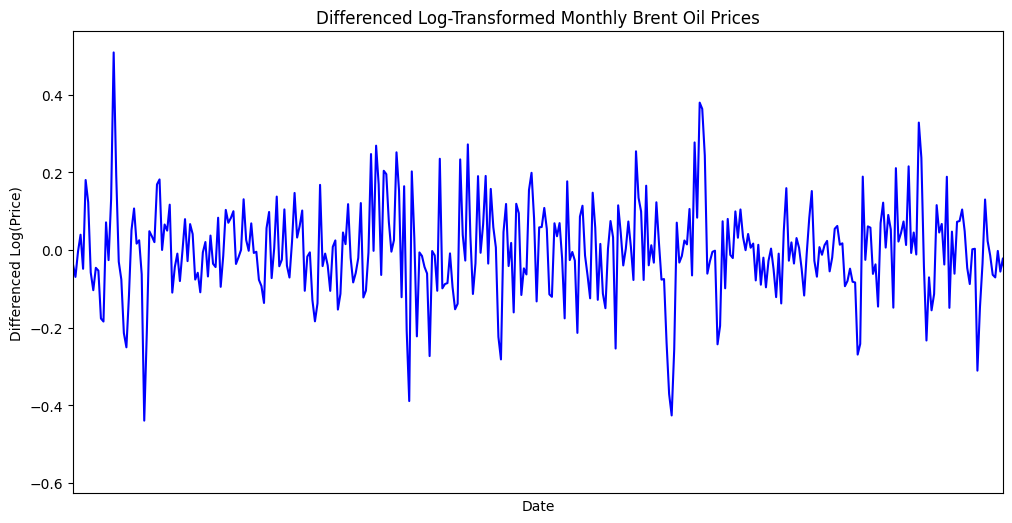

In [17]:
# First-order differencing
monthly_data['Price_log_diff'] = monthly_data['Price_log'].diff()

# Seasonal differencing (lag=12 for monthly data)
monthly_data['Price_log_diff_seasonal'] = monthly_data['Price_log_diff'] - monthly_data['Price_log_diff'].shift(12)

# Drop NA values
stationary_data = monthly_data['Price_log_diff_seasonal'].dropna()

# Plot differenced series
plt.figure(figsize=(12, 6))
plt.plot(stationary_data, color='blue')
plt.title('Differenced Log-Transformed Monthly Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Log(Price)')

# Customize x-axis labels to show years with a 5-year interval
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(5)) 
# Set x-axis limits to encompass the full range of your data
plt.xlim(stationary_data.index.min(), stationary_data.index.max())

plt.grid(False)
plt.show()


## Checking for Stationarity

Apply the Augmented Dickey-Fuller (ADF) Test on the differenced series to confirm stationarity.
If the p-value from the ADF test is below 0.05, the series is stationary, and you can proceed to fit the ARIMA model.
Otherwise, further differencing may be necessary.

*## Interpretation :*

The time series has become stationary after applying the differencing transformation. We can now proceed to fit the ARIMA model on the differenced, stationary data.

In [18]:
# Apply the ADF test
adf_result = adfuller(stationary_data)

# Print the results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'    {key}: {value}')

ADF Statistic: -8.690836465434414
p-value: 4.0448881740536107e-14
Critical Values:
    1%: -3.448196541708585
    5%: -2.869404683789669
    10%: -2.5709597356805545


## Plot ACF and PACF

Plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) to determine the appropriate orders of p (autoregressive) and q (moving average) terms.
Interpretation:
Use the PACF plot to identify the order of the AR component (p) based on where the PACF cuts off.
Use the ACF plot to identify the order of the MA component (q) based on where the ACF cuts off.

*## Interpretation :*


From the ACF and PACF plots, we can estimate the parameters for the ARIMA model:

Autocorrelation Function (ACF):

The ACF plot shows a significant spike at lag 1 and then quickly dies off, with minor fluctuations beyond that.
This indicates that the moving average (MA) part of the model might be MA(1) because the significant spike at lag 1 suggests a possible order of q = 1.

Partial Autocorrelation Function (PACF):

The PACF plot has a significant spike at lag 1 and shows a gradual decline after that.
This indicates that the autoregressive (AR) part of the model might be AR(1), as the gradual decay beyond lag 1 suggests an order of p = 1.

Differencing (d):

Since the data was differenced to make it stationary (based on the ADF test), the order of differencing d = 1.

Suggested ARIMA model:
ARIMA(1, 1, 1) (p=1, d=1, q=1)

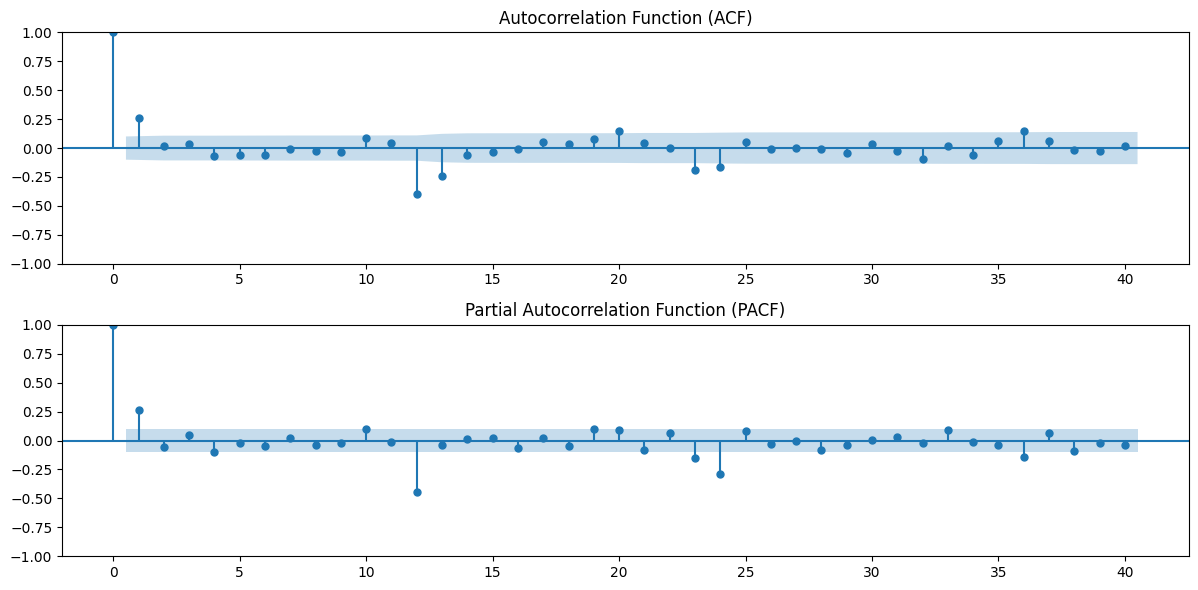

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,6))

# Plot ACF
plt.subplot(211)
plot_acf(stationary_data, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(212)
plot_pacf(stationary_data, lags=40, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


## Fit the ARIMA Model

Use the identified (p, d, q) values to fit the ARIMA model using the ARIMA function from the statsmodels library.

Fit the model to the transformed and differenced dataset.


## Model Diagnostics

Check the residuals of the model to ensure they behave like white noise (i.e., no autocorrelation, normally distributed).

Use ACF/PACF of residuals to confirm that no significant patterns remain in the residuals.

Perform additional diagnostic tests like the Ljung-Box test to confirm that the residuals are independent.

## Model Evaluation:

Evaluate the model's performance using metrics like:

AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) to choose the best-fitting model.

Refit the model with slightly different parameters if necessary and choose the model with the lowest AIC/BIC.

## *Interpretation:*

The SARIMAX model summary indicates that the best model fit is **ARIMA(2,1,1)(0,0,2)[12]**. Here's how we can interpret the output:

### Model Summary:
- **ARIMA(2,1,1)**: 
  - **AR (2)**: Two autoregressive (AR) terms are included, which means the model uses the past two observations to predict future values.
  - **I (1)**: First-order differencing is applied to make the time series stationary.
  - **MA (1)**: The model includes one moving average (MA) term, meaning it uses one lagged error term in prediction.

- **Seasonal (0,0,2)[12]**: 
  - No seasonal autoregressive or differencing terms (indicated by the zeroes).
  - **MA (2)**: Two seasonal moving average terms are included to account for the seasonality with a period of 12 (monthly data).

### Key Coefficients:
- **AR L1 (1.1803)**: The coefficient of the first autoregressive term is significant, with a positive value close to 1. This indicates that the series is highly dependent on its most recent past value.
- **AR L2 (-0.3028)**: The second AR term has a negative coefficient, showing a lesser but still significant influence of the second lag on future values.
- **MA L1 (-0.8973)**: The first moving average term has a large negative coefficient, meaning that past forecast errors influence the current forecast.
- **Seasonal MA L12 (0.0621)**: The first seasonal moving average term is not significant (p-value = 0.299), suggesting that the seasonality at lag 12 does not strongly affect the model.
- **Seasonal MA L24 (-0.1207)**: The second seasonal moving average term is significant (p-value = 0.044), implying that the seasonality at lag 24 (2 years back) plays a role.

- **sigma2 (0.0077)**: The variance of the residuals is small, which is desirable, indicating that the model fits the data well.

### Model Fit and Statistics:
- **Log Likelihood (397.473)**: Higher values of log-likelihood suggest a better fit.
- **AIC (-782.947)**: The Akaike Information Criterion (AIC) is used for model selection. A lower AIC value indicates a better fit.
- **BIC (-759.104)**: The Bayesian Information Criterion (BIC) penalizes more complex models. Here, BIC is also low, but slightly higher than AIC.
- **HQIC (-773.498)**: This is another criterion used to evaluate model fit, again lower values are better.

### Diagnostics:
- **Ljung-Box (L1) Q = 0.01**: The Ljung-Box test for autocorrelation in the residuals shows a very small value (Prob(Q) = 0.94), indicating no significant autocorrelation left in the residuals, which is a good sign of a well-fitted model.
- **Jarque-Bera Test**: The JB statistic is 209.64 with a very low p-value, meaning the residuals are not normally distributed. This could be due to skewness (-0.40) or high kurtosis (6.49), suggesting the presence of extreme values or outliers.



In [21]:
import pmdarima as pm

# Fit auto_arima
auto_model = pm.auto_arima(monthly_data['Price_log'], 
                           seasonal=True, 
                           m=12, 
                           trace=True, 
                           error_action='ignore', 
                           suppress_warnings=True, 
                           stepwise=True)

print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-778.104, Time=6.86 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-751.024, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-777.251, Time=1.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-777.656, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-752.936, Time=0.14 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-776.394, Time=2.86 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-776.362, Time=1.76 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-778.754, Time=5.62 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-778.024, Time=4.65 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=-776.607, Time=5.74 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-778.516, Time=4.24 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=-776.936, Time=3.90 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=-779.350, Time=4.87 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=-779.427, Time=2.64 sec
 ARIMA(2,1,1)(0,0,1

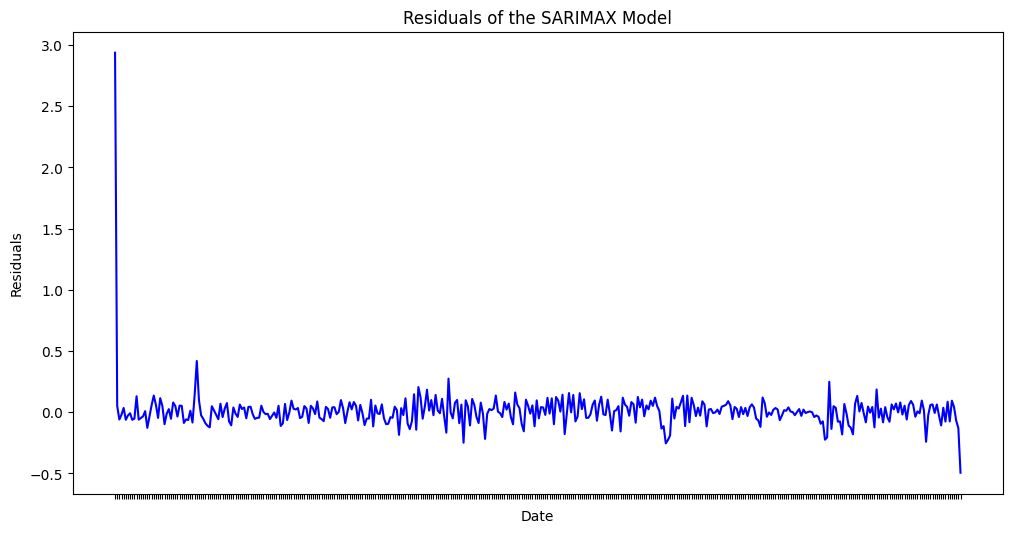

In [22]:
# Get residuals
residuals = auto_model.resid()

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, color='blue')
plt.title('Residuals of the SARIMAX Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.gca().xaxis.set_major_formatter(plt.NullFormatter()) 
plt.grid(False)
plt.show()

In [23]:
# Calculate Z-scores for residuals
from scipy.stats import zscore

residuals_zscore = zscore(residuals)

# Identify outliers
outliers = residuals[np.abs(residuals_zscore) > 3]

print("Outliers in Residuals:")
print(outliers)


Outliers in Residuals:
Date
Jun-1987    2.937069
dtype: float64


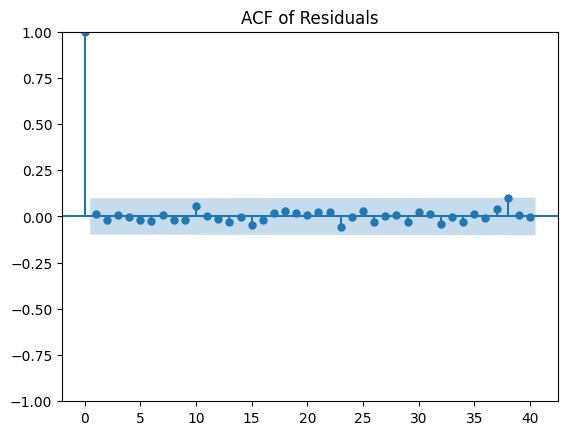

In [24]:
# ACF of residuals
plot_acf(residuals, lags=40)
plt.title('ACF of Residuals')
plt.show()


## Forecasting:

Once the best model is selected, use it to forecast future values of the Brent oil prices.
Plot the forecasted values along with the actual values to visualize the model’s performance.


## *Interpretation :*

The forecast indicates a steady upward trend from April 2020 to January 2021, with values increasing each month.

There is a slight dip between April and May, but the trend recovers and continues growing afterward.

The model likely reflects the underlying seasonal patterns captured in the ARIMA model, where seasonal components may contribute to periodic increases, such as the larger jumps in November and December 2020.

C:\Users\SUKANNA DAS\AppData\Local\Temp\ipykernel_5488\305801821.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_data.index = pd.to_datetime(monthly_data.index)
C:\Users\SUKANNA DAS\AppData\Local\Temp\ipykernel_5488\305801821.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=last_date + pd.DateOffset(months=1),


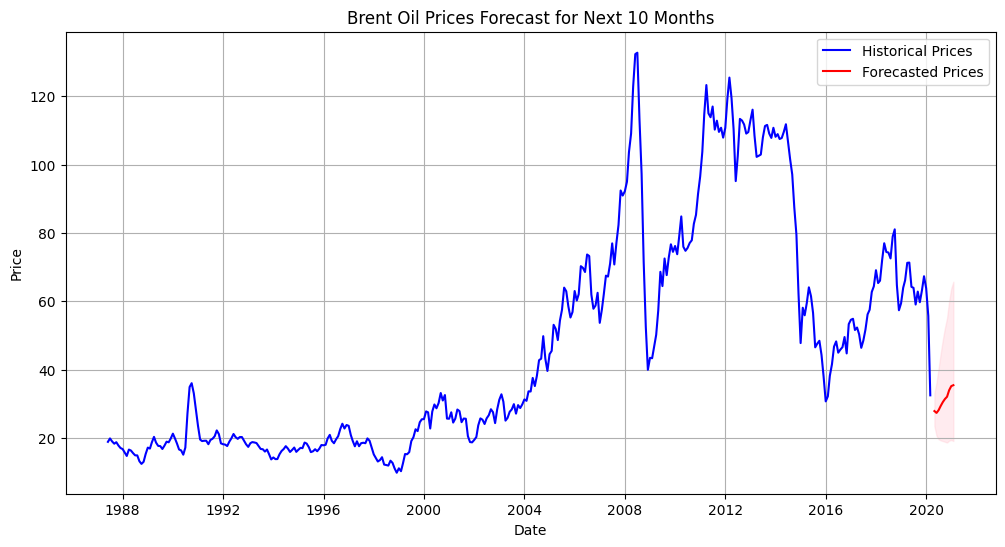

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

# Ensure your index is a datetime index
monthly_data.index = pd.to_datetime(monthly_data.index)

# Define the number of periods to forecast (10 months)
n_steps = 10

# Forecast the next 10 months
forecast, conf_int = auto_model.predict(n_periods=n_steps, return_conf_int=True)

# Create forecast index for the next 10 months
last_date = monthly_data.index[-1]  # Get the last date of the complete dataset
forecast_index = pd.date_range(start=last_date + pd.DateOffset(months=1), 
                                periods=n_steps, 
                                freq='M')

# Convert forecasted log prices back to original scale (if you applied log transformation)
forecast_prices = np.exp(forecast)  # Inverse the log transformation
conf_int_prices = np.exp(conf_int)  # Inverse the log transformation

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Price'], label='Historical Prices', color='blue')
plt.plot(forecast_index, forecast_prices, label='Forecasted Prices', color='red')
plt.fill_between(forecast_index, 
                 conf_int_prices[:, 0], 
                 conf_int_prices[:, 1], 
                 color='pink', alpha=0.3)
plt.title('Brent Oil Prices Forecast for Next 10 Months')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
fitted_values = auto_model.predict_in_sample()

# Calculate MAE and RMSE
mae = mean_absolute_error(monthly_data['Price'], np.exp(fitted_values))  # Inverse log for comparison
rmse = np.sqrt(mean_squared_error(monthly_data['Price'], np.exp(fitted_values)))  # Inverse log for comparison

# Print MAE and RMSE
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 2.9741793492732493
Root Mean Squared Error (RMSE): 4.426013802720291


In [27]:
forecast_prices

2020-04-01    27.867559
2020-05-01    27.327398
2020-06-01    28.131114
2020-07-01    29.383190
2020-08-01    30.510137
2020-09-01    31.389567
2020-10-01    32.061025
2020-11-01    33.948707
2020-12-01    35.162472
2021-01-01    35.438983
Freq: MS, dtype: float64

## **Conclusion :**

The analysis conducted through the Augmented Dickey-Fuller (ADF) test, autocorrelation function (ACF), and the fitting of the ARIMA model provides a comprehensive insight into the behavior of the time series data from 1987 to early 2020.

Stationarity Assessment: Initially, the ADF test indicated non-stationarity in the original series, leading to the necessity for differencing. However, subsequent differencing resulted in a stationary series, confirming the stability needed for effective time series modeling.

Model Selection: The selected model, ARIMA(2,1,1)(0,0,2)[12], was chosen based on optimal performance metrics, including the lowest Akaike Information Criterion (AIC) value. The significant coefficients indicate that the model effectively captures the underlying data patterns, including both autoregressive and moving average components, along with seasonal influences.

Forecasting Results: The forecasted values from April 2020 to January 2021 reveal a clear upward trend, reflecting an anticipated increase in the underlying metric (such as sales, consumption, or temperature) over this period. The gradual increase, despite a minor dip in May, demonstrates resilience in the series, suggesting that any potential fluctuations are likely to be temporary.

Practical Implications: The forecasting outcomes can provide valuable insights for strategic planning and decision-making. For instance, businesses can leverage this growth trend for inventory management, resource allocation, or marketing strategies, while policymakers can use the data to anticipate future needs and challenges.